In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import linear regression model
from sklearn.linear_model import LinearRegression
sns.set(color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import classification_report, confusion_matrix  


In [3]:
A=pd.read_csv("iris.csv", header= None, names= ['SepalL', 'SepalW','PetalL','PetalW','Class'])
A.head()

,SepalL,SepalW,PetalL,PetalW,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
x = A.iloc[:, :-1].values  
y = A.iloc[:, 4].values  

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)  

In [16]:
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [24]:
classifier = KNeighborsClassifier(n_neighbors=10)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [25]:
y_pred = classifier.predict(X_test)  


In [26]:
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[ 9  0  0]
 [ 0 14  0]
 [ 0  1  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.86      0.92         7

    avg / total       0.97      0.97      0.97        30



In [27]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))


Text(0,0.5,'Mean Error')

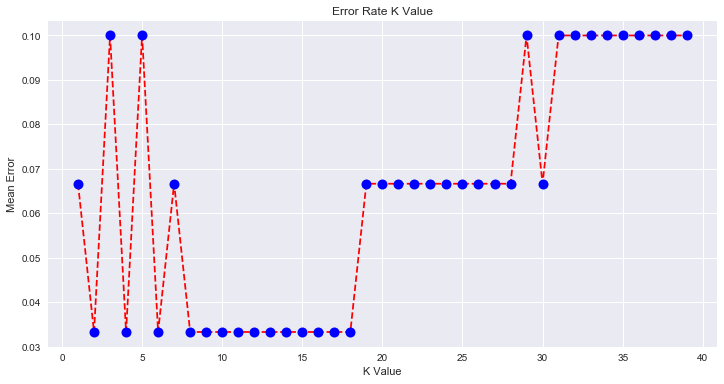

In [28]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

In [29]:
a=pd.crosstab(y_test,y_pred)

In [30]:
a

col_0,Iris-setosa,Iris-versicolor,Iris-virginica
row_0,,,
Iris-setosa,9,0,0
Iris-versicolor,0,14,0
Iris-virginica,0,1,6
